# Face Recognition

**Step-1 importing libraries**

In [27]:
import glob
import dlib
import cv2
import pickle
import random
import facevec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imutils import face_utils


In [8]:
def adjust_gamma(input_image, gamma=1.0):
    table = np.array([((iteration / 255.0) ** (1.0 / gamma)) * 255
                      for iteration in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(input_image, table)

In [9]:
def read_image(path, gamma=0.75):
    output = cv2.imread(path)
    return adjust_gamma(output, gamma=gamma)

In [7]:
def face_vector(input_image):
    faces = facevec.detector(input_image, 1)
    if not faces:
        return None

    f = faces[0]
    shape = facevec.predictor(input_image, f)
    face_descriptor = facevec.face_model.compute_face_descriptor(input_image, shape)
    return face_descriptor

In [10]:
male = 0
female = 1

In [2]:
print("Retrieving Male images ...")
sub1 = glob.glob("./data/face_data/male/*.png")
print("Retrieved {} faces !".format(len(sub1)))

print("Retrieving female images ...")
sub2 = glob.glob("./data/face_data/female/*.png")
print("Retrieved {} faces !".format(len(sub2)))


Retrieving Male images ...
Retrieved 75 faces !
Retrieving female images ...
Retrieved 64 faces !


In [8]:
vectors = dlib.vectors()
labels = dlib.array()

In [11]:
print("Reading Males images ...")
for i, sub in enumerate(sub1):
    print("Reading {} of {}\r".format(i, len(sub1)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(male)

Reading Males images ...
Reading 0 of 76
Reading 1 of 76
Reading 2 of 76
Reading 3 of 76
Reading 4 of 76
Reading 5 of 76
Reading 6 of 76
Reading 7 of 76
Reading 8 of 76
Reading 9 of 76
Reading 10 of 76
Reading 11 of 76
Reading 12 of 76
Reading 13 of 76
Reading 14 of 76
Reading 15 of 76
Reading 16 of 76
Reading 17 of 76
Reading 18 of 76
Reading 19 of 76
Reading 20 of 76
Reading 21 of 76
Reading 22 of 76
Reading 23 of 76
Reading 24 of 76
Reading 25 of 76
Reading 26 of 76
Reading 27 of 76
Reading 28 of 76
Reading 29 of 76
Reading 30 of 76
Reading 31 of 76
Reading 32 of 76
Reading 33 of 76
Reading 34 of 76
Reading 35 of 76
Reading 36 of 76
Reading 37 of 76
Reading 38 of 76
Reading 39 of 76
Reading 40 of 76
Reading 41 of 76
Reading 42 of 76
Reading 43 of 76
Reading 44 of 76
Reading 45 of 76
Reading 46 of 76
Reading 47 of 76
Reading 48 of 76
Reading 49 of 76
Reading 50 of 76
Reading 51 of 76
Reading 52 of 76
Reading 53 of 76
Reading 54 of 76
Reading 55 of 76
Reading 56 of 76
Reading 57 of 76

In [10]:
print("Reading Female  images ...")
for i, sub in enumerate(sub2):
    print("Reading {} of {}\r".format(i, len(sub2)))
    face_vectors = face_vector(read_image(sub))
    if face_vectors is None:
        continue
    vectors.append(dlib.vector(face_vectors))
    labels.append(female)

Reading Female  images ...
Reading 0 of 64
Reading 1 of 64
Reading 2 of 64
Reading 3 of 64
Reading 4 of 64
Reading 5 of 64
Reading 6 of 64
Reading 7 of 64
Reading 8 of 64
Reading 9 of 64
Reading 10 of 64
Reading 11 of 64
Reading 12 of 64
Reading 13 of 64
Reading 14 of 64
Reading 15 of 64
Reading 16 of 64
Reading 17 of 64
Reading 18 of 64
Reading 19 of 64
Reading 20 of 64
Reading 21 of 64
Reading 22 of 64
Reading 23 of 64
Reading 24 of 64
Reading 25 of 64
Reading 26 of 64
Reading 27 of 64
Reading 28 of 64
Reading 29 of 64
Reading 30 of 64
Reading 31 of 64
Reading 32 of 64
Reading 33 of 64
Reading 34 of 64
Reading 35 of 64
Reading 36 of 64
Reading 37 of 64
Reading 38 of 64
Reading 39 of 64
Reading 40 of 64
Reading 41 of 64
Reading 42 of 64
Reading 43 of 64
Reading 44 of 64
Reading 45 of 64
Reading 46 of 64
Reading 47 of 64
Reading 48 of 64
Reading 49 of 64
Reading 50 of 64
Reading 51 of 64
Reading 52 of 64
Reading 53 of 64
Reading 54 of 64
Reading 55 of 64
Reading 56 of 64
Reading 57 of 

# Training

In [12]:
type(vectors)

dlib.vectors

In [13]:
vec = np.array(vectors)

In [14]:
lab = np.array(labels)

> **Saving into csv file**

In [19]:
X = vec
y = lab.reshape(-1,1)

In [26]:
X = X[1:]

In [27]:
dataset = np.append(X,y,axis = 1)

In [28]:
np.savetxt('face_vectors.csv',dataset,delimiter = ',')

> ## Test Train Split

In [29]:
from sklearn.cross_validation import train_test_split

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

> ## Building Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier


In [32]:
model_knn = KNeighborsClassifier(n_neighbors=3)


In [33]:
model_knn.fit(x_train, y_train) # training model



C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srikanth\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\srikanth\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
y_pred_knn = model_knn.predict(x_test) # we use this for evaluation


In [35]:
from sklearn.metrics import confusion_matrix, classification_report


In [38]:
cm_knn = confusion_matrix(y_test, y_pred_knn) # confusion matrix


cr_knn = classification_report(y_test, y_pred_knn) # classification report

In [37]:
import seaborn as sns

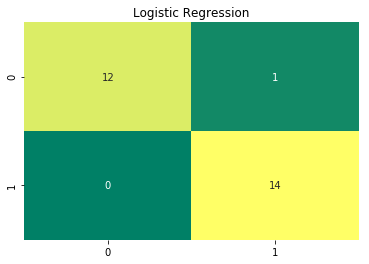

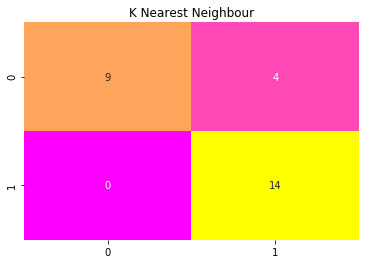

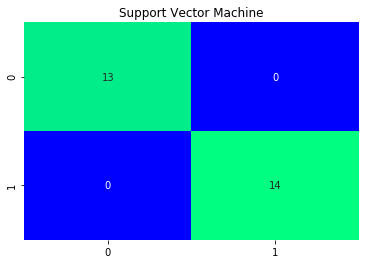

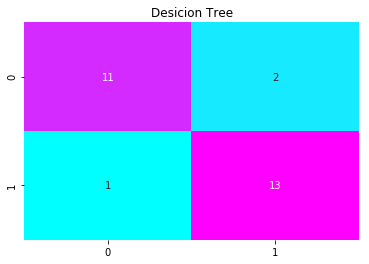

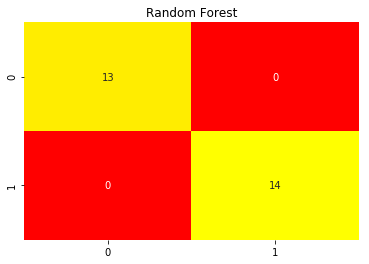

In [42]:
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'summer')
plt.title('K Nearest Neighbour')
plt.show()

In [43]:
print('='*20+'KNearest Neighbour'+'='*20)
print(cr_knn)

====================Logistic Regression====================
             precision    recall  f1-score   support

        0.0       1.00      0.92      0.96        13
        1.0       0.93      1.00      0.97        14

avg / total       0.97      0.96      0.96        27

====================KNearest Neighbour====================
             precision    recall  f1-score   support

        0.0       1.00      0.69      0.82        13
        1.0       0.78      1.00      0.88        14

avg / total       0.88      0.85      0.85        27

====================Support Vector Machine====================
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        13
        1.0       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        27

====================Descion Tree====================
             precision    recall  f1-score   support

        0.0       0.92      0.85      0.88        13
        1.0  

In [44]:
from sklearn.externals import joblib

In [45]:
joblib.dump(model_svm,'gender_class.pkl')

['gender_class.pkl']